# Assignment 3: Clustering - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

**Load dataset**

In [2]:
df = pd.read_csv('data_assignment3.csv')

df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


## Question 1

### **a.** Scatter Plot

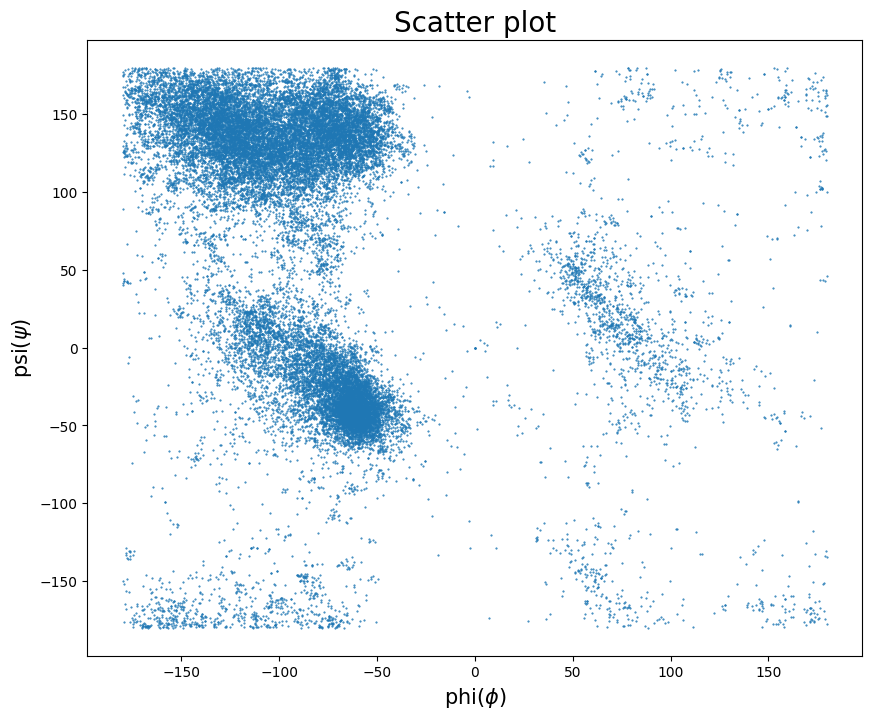

In [3]:
plt.figure(figsize=(10,8))

plt.scatter(df['phi'], df['psi'], marker='.', s=1)

plt.xlabel('phi($\phi$)', fontsize=15)
plt.ylabel('psi($\psi$)', fontsize=15)
plt.title('Scatter plot', fontsize=20)

plt.show()

### **b.** 2D Histogram

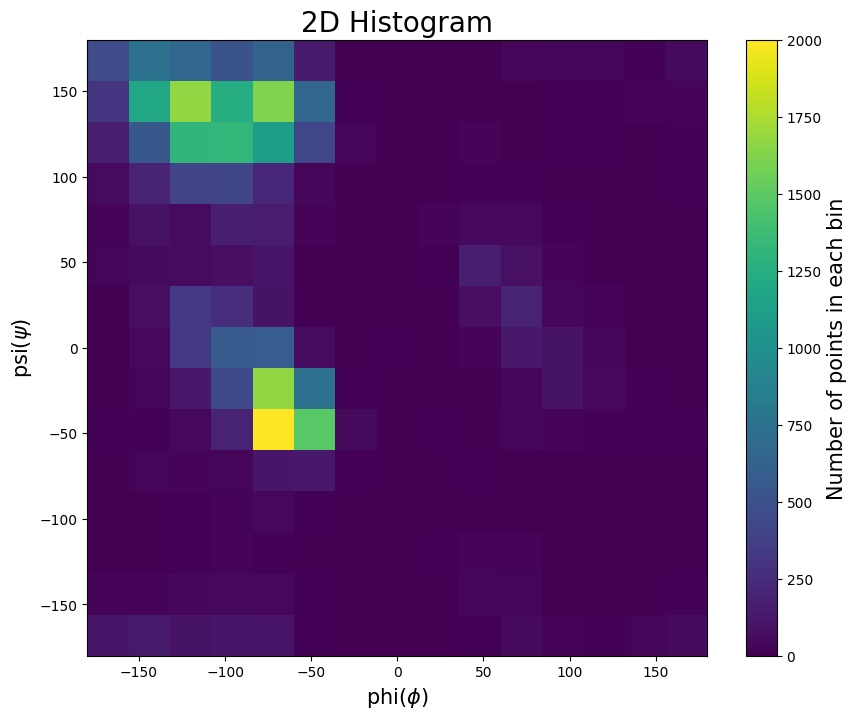

In [4]:
plt.figure(figsize=(10,8))

h = plt.hist2d(df['phi'], df['psi'], bins=15,cmap='viridis')
cbar = plt.colorbar(h[3])

plt.xlabel('phi($\phi$)', fontsize=15)
plt.ylabel('psi($\psi$)', fontsize=15)
plt.title('2D Histogram', fontsize=20)
cbar.set_label('Number of points in each bin', fontsize=15)

plt.show()

### **c.** Transform the data



Since the edges of the Ramachandran plot wrap around, phi and psi angles that are close to the edge of the plot may actually be close to angles on the opposite side of the plot. 

To address this issue, we calculate the circular coordinates of phi and psi, by using the symmetry of the sine and cosine functions.

In [5]:
# Convert phi and psi data into circular coordinates (in rad)
phi= np.deg2rad(df['phi'])
psi = np.deg2rad(df['psi'])

r = np.sqrt(phi**2 + psi**2)

df['x_phi'] = r * np.cos(phi)
df['x_psi'] = r * np.cos(psi)

df['y_phi'] = r * np.sin(phi)
df['y_psi'] = r * np.sin(psi)

df.head()

,residue name,position,chain,phi,psi,x_phi,x_psi,y_phi,y_psi
0,LYS,10,A,-149.312855,142.657714,-3.099531,-2.865468,-1.839426,2.186246
1,PRO,11,A,-44.283210,136.002076,1.787126,-1.795782,-1.742961,1.734041
2,LYS,12,A,-119.972621,-168.705263,-1.805045,-3.543104,-3.129882,-0.707644
3,LEU,13,A,-135.317212,137.143523,-2.390849,-2.464992,-2.364521,2.287125
4,LEU,14,A,-104.851467,95.928520,-0.635746,-0.256189,-2.397481,2.467074


## Question 2
**Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.**

### **a.** Evaluate K


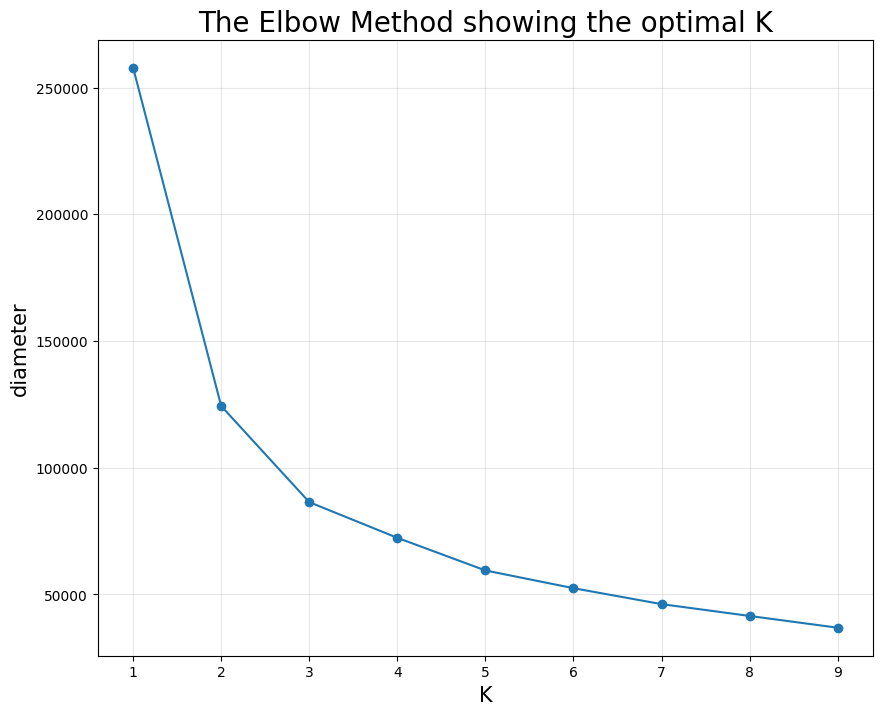

In [6]:
K_range = range(1,10)
diameter = []

for k in K_range:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeanModel.fit(df[['x_phi', 'y_phi', 'x_psi', 'y_psi']])
    
    diameter.append(kmeanModel.inertia_)


# Plot
plt.figure(figsize=(10,8))

plt.plot(K_range, diameter, 'o-')


plt.grid(zorder=0, alpha=0.3)
plt.xlabel('K', fontsize=15)
plt.ylabel('diameter', fontsize=15)
plt.title('The Elbow Method showing the optimal K', fontsize=20)

plt.show()

**Choose K=3**

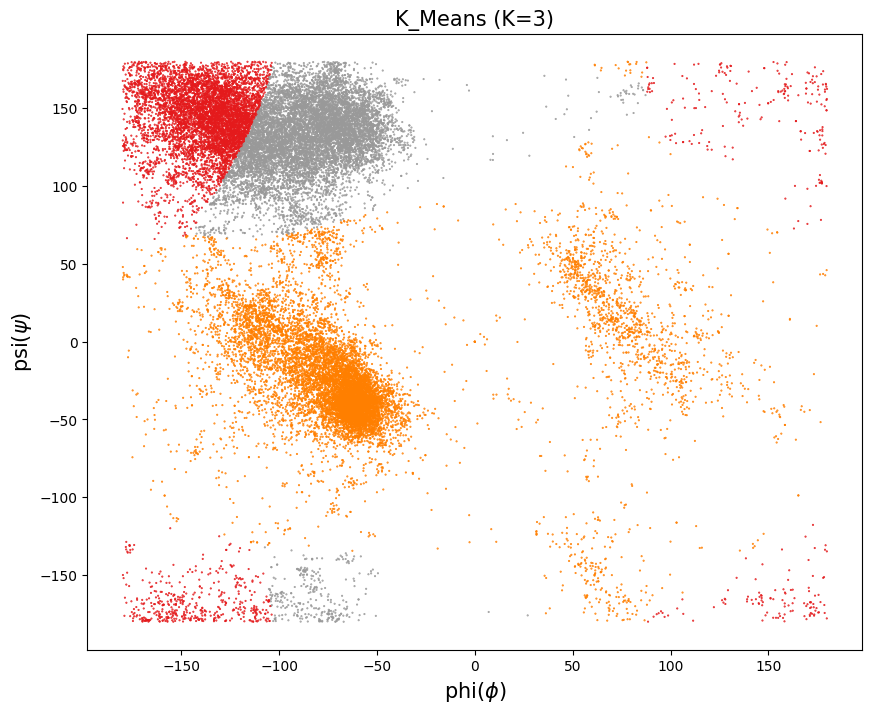

In [7]:
kmeanModel = KMeans(n_clusters=3, n_init=10)
kmeanModel.fit(df[['x_phi', 'y_phi', 'x_psi', 'y_psi']])

df['k_means'] = kmeanModel.predict(df[['x_phi','y_phi','x_psi','y_psi']])

# Plot
plt.figure(figsize=(10,8))

plt.scatter(df['phi'], df['psi'], c=df['k_means'], cmap=plt.cm.Set1, marker='.', s=1)

plt.xlabel('phi($\phi$)', fontsize=15)
plt.ylabel('psi($\psi$)', fontsize=15)

plt.title('K_Means (K=3)', fontsize=15)

plt.show()

### **b.** Do the clusters found in part (a) seem reasonable?

With **K=3**, the clusters seem unreasonable, as you can see from the figure above. This is due to the fact that K-means algorithm assumes that clusters are spherical and have equal sizes, which is not the case in our dataset.

## Question 3

### **a.** Motivate the choice of eps and min_samples

'**eps**' determines the maximum acceptable distance between two points for them to be considered as part of the same cluster. 
 - A large eps value will result in larger clusters and more points being assigned to a cluster.
 - A small eps value will result in smaller clusters and fewer points being assigned to a cluster.



'**min_samples**' determines the minimum acceptable number of samples in the neighbourhood for a point to be considered as a core point.
 - A large min_samples value will result in fewer clusters being formed and more noise points. 
 - A small min_samples value will result in more clusters being formed and fewer noise points. 

Based on the scatter plot presented in Question 1 and similar Ramachandran Plots, it is relatively obvious that there are three main clusters. The first two clusters are located in the top left and middle left, while the third cluster is less dense compared to the first two but still noticeable in the middle right.

Also, we evaluate the performance of the clustering algorithm using silhouette score metrics, it ranges from -1 to 1. A High value indicate good separation between clusters.

In [8]:
X = df[['x_phi', 'y_phi', 'x_psi', 'y_psi']]

print(' min_samples |  silhouette_score')
print('-------------|--------------------')

for min_samples in range(50, 500, 50):
    db = DBSCAN(eps=0.5, min_samples=min_samples).fit(X)
    labels = db.labels_
    silhouette_avg = silhouette_score(X, labels)
    
    print(str(min_samples).rjust(8, ' ') + '     | ' + str(silhouette_avg))

 min_samples |  silhouette_score
-------------|--------------------
      50     | 0.02570710513522532
     100     | 0.1427214155613429
     150     | 0.12267911527972548
     200     | 0.4187772501625873
     250     | 0.4046081802379267
     300     | 0.38885561203242364
     350     | 0.3685741133795966
     400     | 0.39190642462087044
     450     | 0.3762092903204804


Thus we would select eps and the minimum number of samples which would give us three clusters shown in the expected location. 

In our case, we choose **eps=0.5**, and **min_samples=200** which gives us good result.

In [9]:
X = df[['x_phi', 'y_phi', 'x_psi', 'y_psi']]
df_points = df[['phi', 'psi']]

db = DBSCAN(eps=0.5, min_samples=200).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of outliers: %d' % n_noise_)

DBSCAN(min_samples=200)
Estimated number of clusters: 3
Estimated number of outliers: 3699


### **b.** Plot the clusters

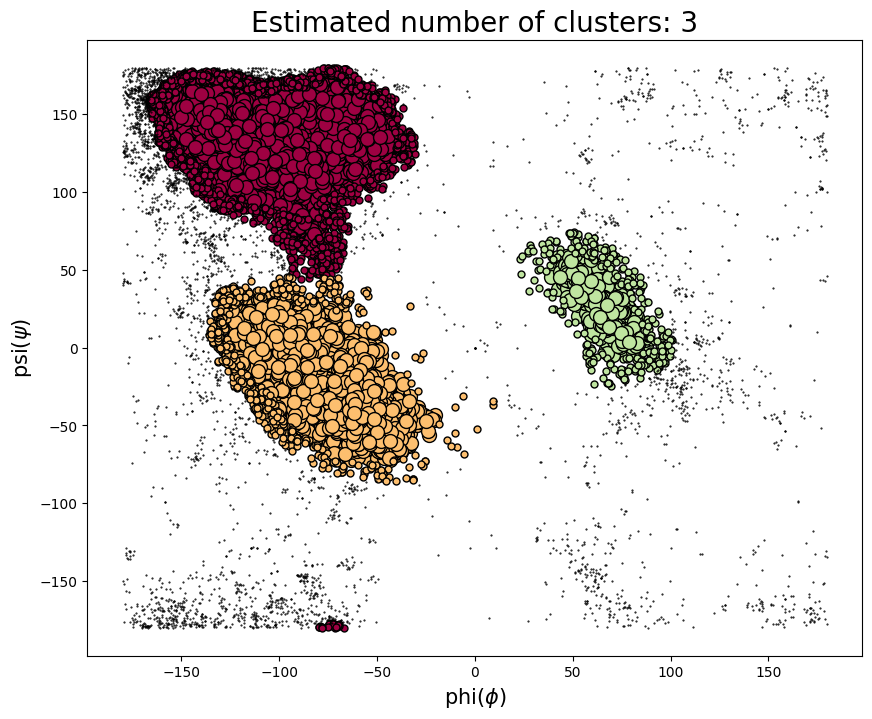

In [10]:
unique_labels = set(labels)

# Plot
plt.figure(figsize=(10,8))

# print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        xy_noise = df_points[class_member_mask]
        plt.plot(xy_noise['phi'], xy_noise['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=0.5)
        continue

    xy_core = df_points[class_member_mask & core_samples_mask]
    plt.plot(xy_core['phi'], xy_core['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    xy_border = df_points[class_member_mask & ~core_samples_mask]
    plt.plot(xy_border['phi'], xy_border['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=5)


plt.xlabel('phi($\phi$)', fontsize=15)
plt.ylabel('psi($\psi$)', fontsize=15)
plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=20)

plt.show()

### **c.** Plot outliers

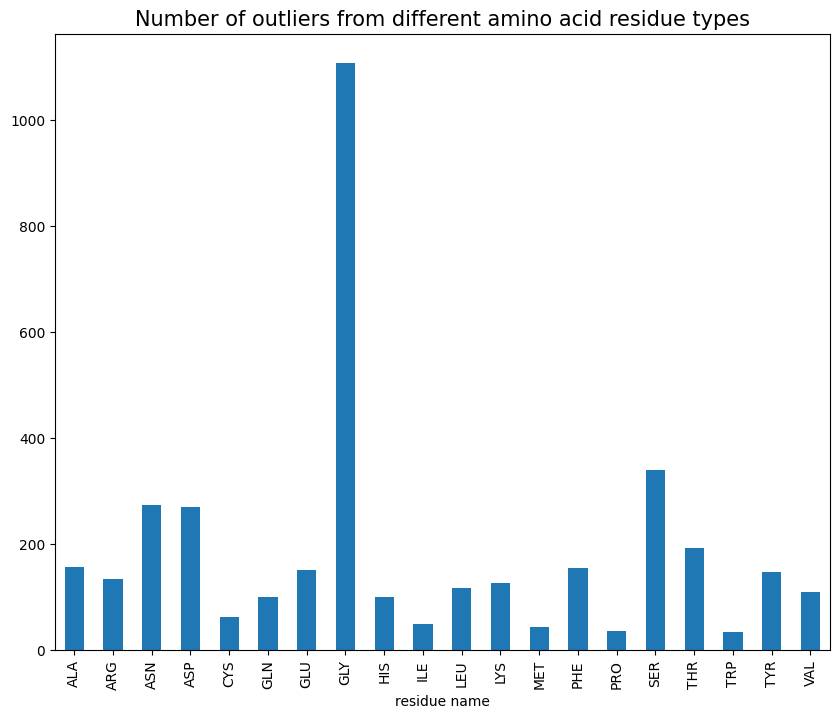

In [11]:
df_residue = df[labels==-1].groupby('residue name').size()

plt.figure(figsize=(10,8))

df_residue.plot.bar()
plt.title('Number of outliers from different amino acid residue types', fontsize=15)

plt.show()

### **d.** DBSCAN vs K-means for clustering

From the visualised data above we conclude that DBSCAN clustering performs much better than K-means clustering in our scenario. This is determined mainly by the characteristics of the datasets. Generally speaking,


**DBSCAN**

* Pros: DBSCAN can identify clusters of arbitrary shape, and it doesn't require to specify the number of clusters in advance which can be an advantage in some cases where the number of clusters is unknown. Also, DBSCAN can exclude noise points from clusters. 
* Cons: DBSCAN is sensitive to the choice of parameters (eps and min_samples).


**K-means**

* Pros: K-means clustering fits well if the data has spherical clusters and it is fast compared with DBSCAN, 
* Cons: The result of K-means depends on initialization and K-it cannot handle noise.

## Question 4

In [12]:
df_pro = df[df['residue name']=='PRO']

df_pro.head()

,residue name,position,chain,phi,psi,x_phi,x_psi,y_phi,y_psi,k_means
1,PRO,11,A,-44.283210,136.002076,1.787126,-1.795782,-1.742961,1.734041,2
17,PRO,27,A,-49.944645,-25.888991,0.631846,0.883311,-0.751529,-0.428703,1
68,PRO,79,A,-76.452014,97.745207,0.507366,-0.291885,-2.105563,2.146070,2
110,PRO,121,A,-53.054020,-27.254912,0.625709,0.925432,-0.831975,-0.476729,1
123,PRO,134,A,-66.751364,94.099782,0.794815,-0.143960,-1.850104,2.008455,2


**Scatter plot**

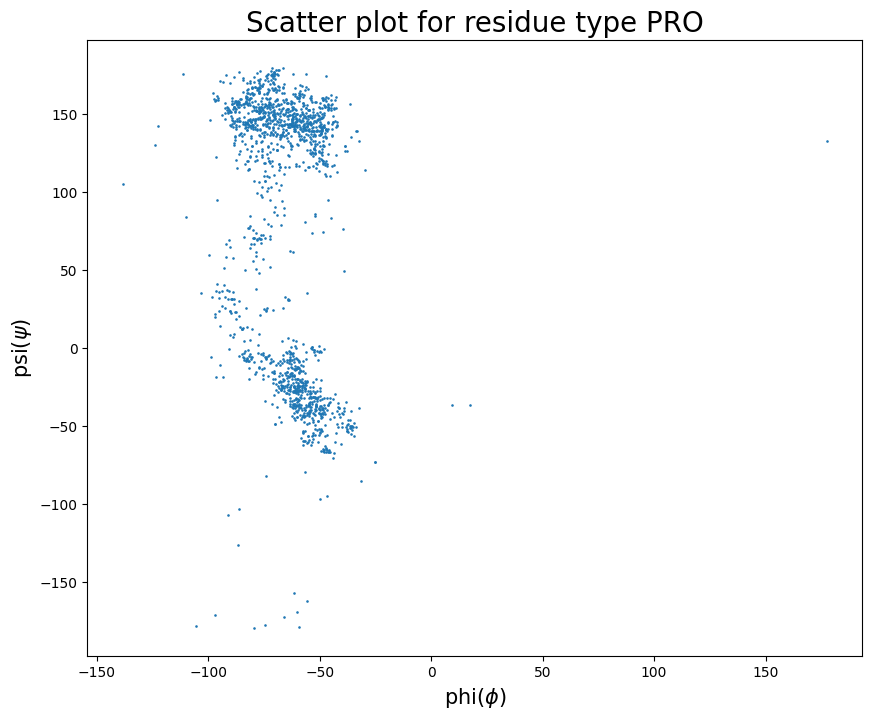

In [13]:
plt.figure(figsize=(10,8))

plt.scatter(df_pro['phi'], df_pro['psi'], marker='.', s=3)

plt.xlabel('phi($\phi$)', fontsize=15)
plt.ylabel('psi($\psi$)', fontsize=15)
plt.title('Scatter plot for residue type PRO', fontsize=20)

plt.show()

In [14]:
X = df_pro[['x_phi', 'y_phi', 'x_psi', 'y_psi']]

print(' min_samples |  silhouette_score')
print('-------------|--------------------')

for min_samples_pro in range(10, 100, 10):
    db_pro = DBSCAN(eps=0.5, min_samples=min_samples_pro).fit(X)
    labels = db_pro.labels_
    silhouette_avg = silhouette_score(X, labels)
    
    print(str(min_samples_pro).rjust(7, ' ') + '      | ' + str(silhouette_avg))


 min_samples |  silhouette_score
-------------|--------------------
     10      | 0.2273323341457407
     20      | 0.5622428248934189
     30      | 0.5569529953931517
     40      | 0.6004736671266034
     50      | 0.5952056608025365
     60      | 0.5846110049824679
     70      | 0.5690662418882269
     80      | 0.5298544659305746
     90      | 0.5085898622851854


**Select eps=0.5, min_samples=40**

In [15]:
df_points = df_pro[['phi', 'psi']]

db_pro = DBSCAN(eps=0.5, min_samples=40).fit(X)
core_samples_mask = np.zeros_like(db_pro.labels_, dtype=bool)
core_samples_mask[db_pro.core_sample_indices_] = True
labels_pro = db_pro.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_pro)) - (1 if -1 in labels_pro else 0)
n_noise_ = list(labels_pro).count(-1)

print(db_pro)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of outliers: %d' % n_noise_)

DBSCAN(min_samples=40)
Estimated number of clusters: 2
Estimated number of outliers: 112


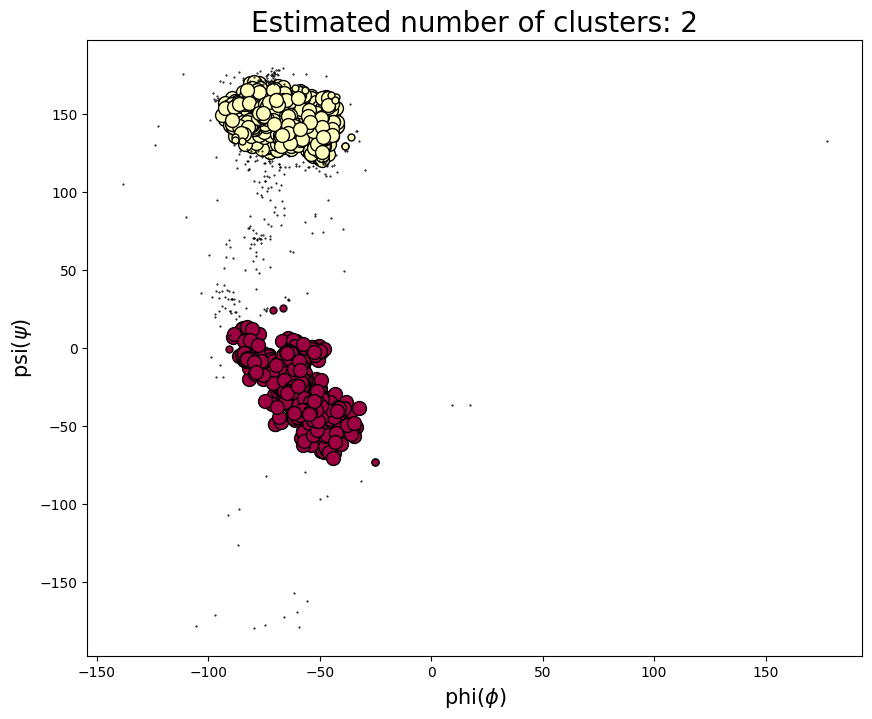

In [16]:
unique_labels = set(labels_pro)
# print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10,8)) 

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        xy_noise = df_points[class_member_mask]
        plt.plot(xy_noise['phi'], xy_noise['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=0.5)
        continue

    xy_core = df_points[class_member_mask & core_samples_mask]
    plt.plot(xy_core['phi'], xy_core['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    xy_border = df_points[class_member_mask & ~core_samples_mask]
    plt.plot(xy_border['phi'], xy_border['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=5)


plt.xlabel('phi($\phi$)', fontsize=15)
plt.ylabel('psi($\psi$)', fontsize=15)
plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=20)

plt.show()

**Conclusion**

- In clusters found for amino acid residues of type PRO we should choose a smaller min_samples since the dataset is smaller. By using silhouette score metrics, we choose min_samples=40 as it gives us the best score.
- In Question 3, the numbers of clusters is 3, however, in Question 4, the estimated number of clusters is 2, the change of datasets have influence on the clustering results. 
- With respect to question 3d, we know that DBSCAN is sensitive to the choice of parameters. It is important to select these parameters appropriately.